In [1]:
#Clean Data Cell

#open and print the file
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[20,15]

df=pd.read_csv("data.csv",header=0)

#How we would have done it before
#df["Value"]= df["Value"].replace("(D)",math.nan)

#replace the "," with ""
df["Value"]=df["Value"].str.replace(",","")

#go through the value and convert everything to a number
df['Value']=pd.to_numeric(df["Value"],errors="coerce")

#drop everything that isn't a number
df.dropna(subset=["Value"], inplace=True)

In [2]:
#Show honey production levels over the years, state by state
#Columns we need are Year, State, and the Value

#before we grabbed all the unique countries then iterate over the data
#pandas has this cool trick called groupby

allHoney=[]
allStates=[]
uniqueStates=df['State'].unique()

#without grouping
for state in uniqueStates:
    #honey = df[df['State']== state]['Value'] #creates a new data set
    #if state is in unique states pull the value and group by the year
    honey=df[df["State"]== state].groupby('Year')["Value"]
    #print(state,honey.sum())
    allHoney.append(honey.sum())
    allStates.append(state)

Plot The Honey Porduction per State Over Time
--Y axis will share the Honey Production In Pound
--X axis will be the time span of data
--Each Line Will Represent A Different State

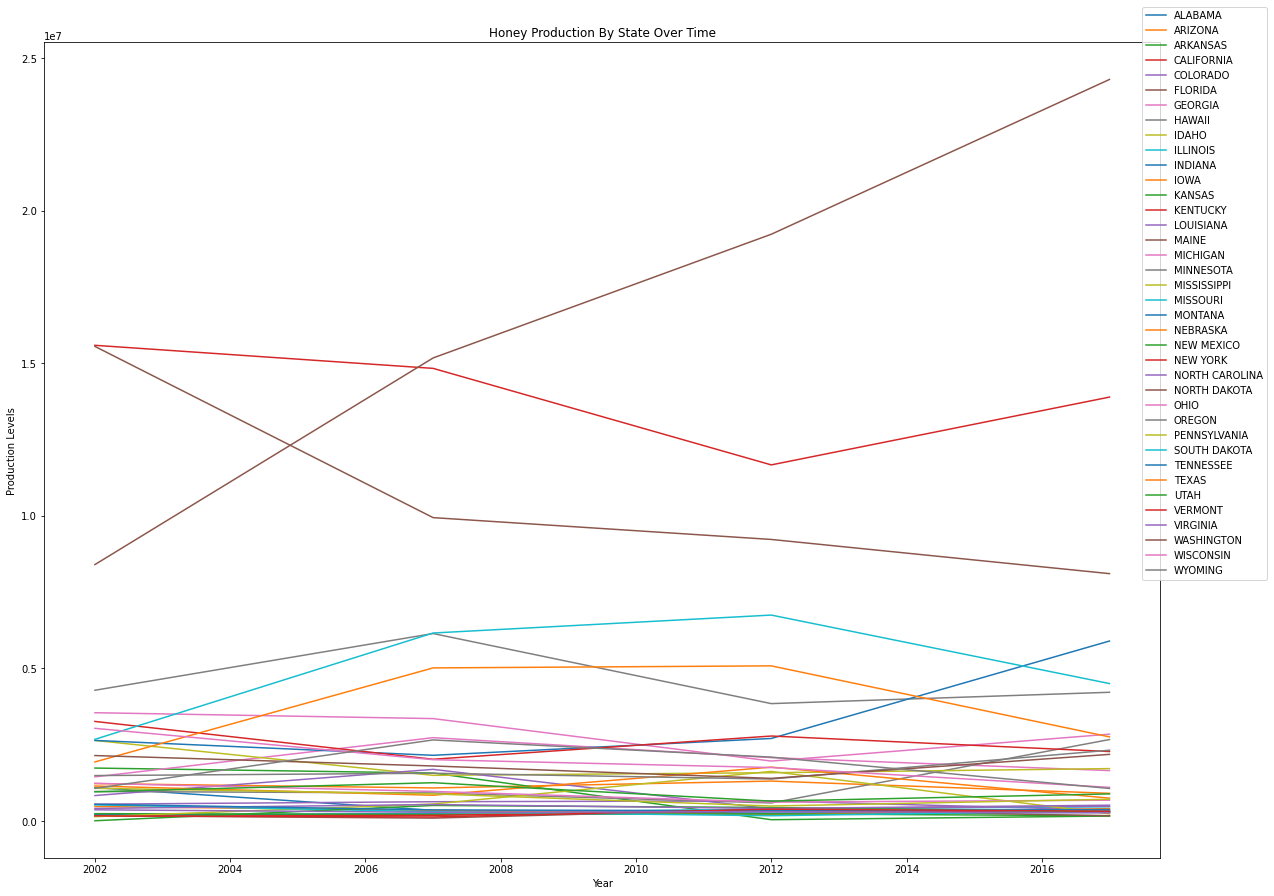

In [3]:
for i in range(len(allHoney)):
    LargeProducer=7.5e5
    smallProducer=5e6
    #get the state and its honey value
    state=uniqueStates[i]
    honey=allHoney[i]
    #get the years
    years=honey.keys()
    #Find if they are a large Producer
    if sum(honey)>LargeProducer:
        plt.plot(years,honey,label=state)
    
plt.title("Honey Production By State Over Time")
plt.xlabel("Year")
plt.ylim()
plt.ylabel("Production Levels")
plt.legend(bbox_to_anchor=(1.1,1.05))
plt.show()

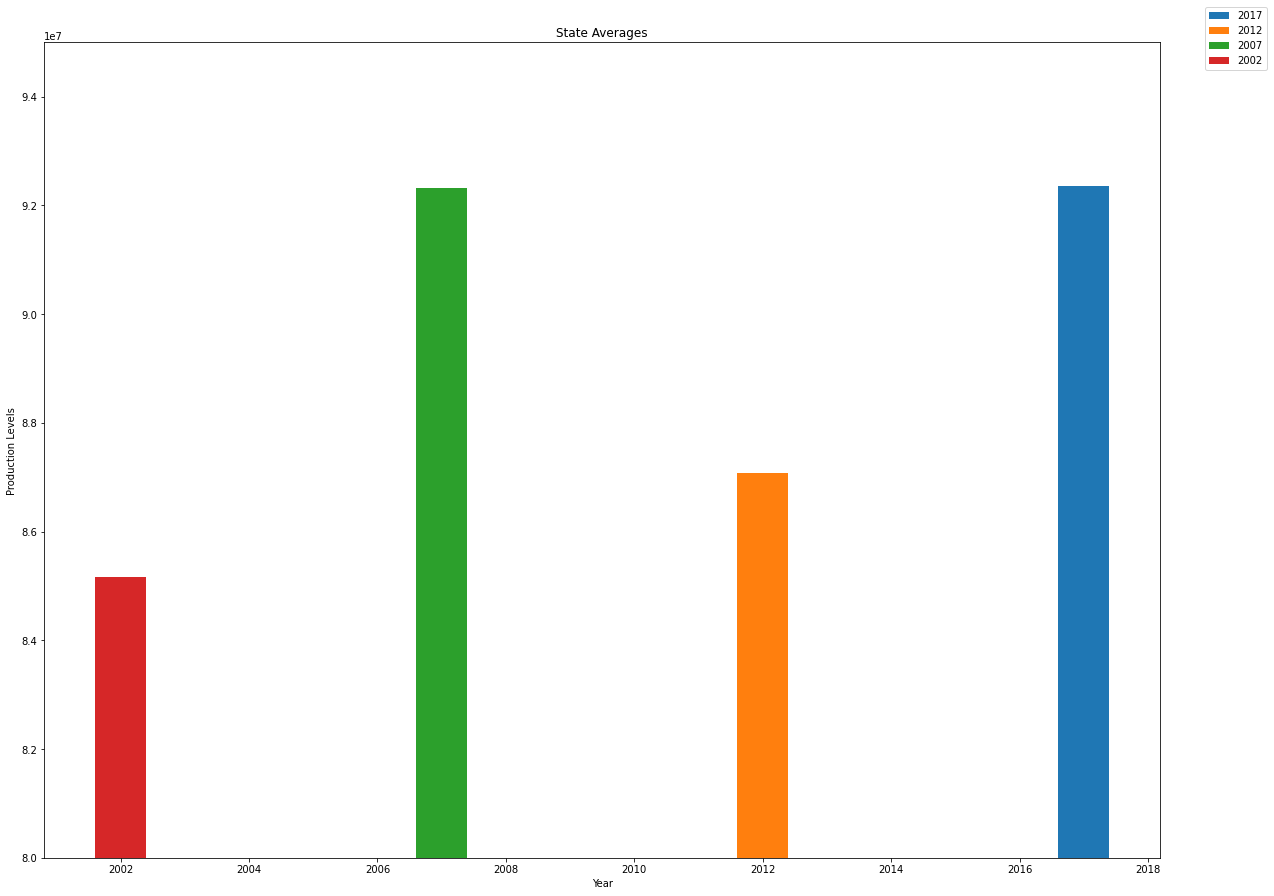

In [4]:
#Find and graph the Averages and Totals
#Bar Graph Time

allHoney=[]
allStates=[]
uniqueStates=df['State'].unique()
#for state in uniqueStates:
#    honey=df[df["State"]== state].groupby('Year')["Value"]
#    meanHoney=honey.mean()
#    years=meanHoney.keys()
#    plt.bar(years,meanHoney,label=state)
uniqueYears=df["Year"].unique()

for year in uniqueYears:
    totals=df[df["Year"]== year].groupby('Year')["Value"]
    totalSum= totals.sum()
    years=totalSum.keys()
    plt.bar(years,totalSum,label=year)
    
plt.title("State Averages")
plt.xlabel("Year")
plt.ylim(8e7,9.5e7)
plt.ylabel("Production Levels")
plt.legend(bbox_to_anchor=(1.1,1.05))
plt.show()